### IMPORT LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### IMPORT DATA

In [30]:
train_data=pd.read_csv("train_data.csv")
test_data=pd.read_csv("test_data.csv")
val_data=pd.read_csv("validate_data.csv")

### TRAIN AND TEST DIMENSIONS

In [31]:
train_data.shape

(614, 13)

In [32]:
test_data.shape

(367, 12)

### TRAIN AND TEST TOP 5 ROWS

In [33]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### CHECKING DATATYPES OF TRAIN AND TEST DATA

In [35]:
print("TRAIN INFO :")
print(train_data.info(),"\n")

print("TEST INFO :")
print(test_data.info())

TRAIN INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None 

TEST INFO :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null ob

### STATISTICAL INFO OF TRAIN AND TEST DATA

In [36]:
print("TRAIN STATISTICAL INFO:\n",train_data.describe(),"\n","TEST STATISTICAL INFO:\n",test_data.describe())

TRAIN STATISTICAL INFO:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000   
 TEST STATISTICAL INFO:
        ApplicantIncome  CoapplicantIncome  LoanAmount  Lo

### CHECKING MISSING DATA OF TRAIN AND TEST DATA

In [37]:
print("TRAIN MISSING DATA:\n",train_data.isnull().sum(),"\n","TEST MISSING DATA:\n",test_data.isnull().sum())

TRAIN MISSING DATA:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 
 TEST MISSING DATA:
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### HANDLING MISSING DATA IN TRAIN AND TEST DATA

In [38]:
train_data['Gender'] = train_data[['Gender']].fillna("Male")
train_data['Married'] = train_data[['Married']].fillna("Yes")
train_data['Dependents'] = train_data[['Dependents']].fillna("0")
train_data['Self_Employed']=train_data[['Self_Employed']].fillna("No")
train_data['LoanAmount']=train_data[['LoanAmount']].fillna(train_data['LoanAmount'].mean())
train_data['Loan_Amount_Term']=train_data['Loan_Amount_Term'].fillna(360.0)
train_data['Credit_History']=train_data['Credit_History'].fillna(1.0)

test_data['Gender'] = test_data[['Gender']].fillna("Male")
test_data['Dependents'] = test_data[['Dependents']].fillna("0")
test_data['Self_Employed']=test_data[['Self_Employed']].fillna("No")
test_data['LoanAmount']=test_data[['LoanAmount']].fillna(test_data['LoanAmount'].mean())
test_data['Loan_Amount_Term']=test_data['Loan_Amount_Term'].fillna(360.0)
test_data['Credit_History']=test_data['Credit_History'].fillna(1.0)

### OUTLIERS DETECTIONS  IN TRAIN AND TEST DATA

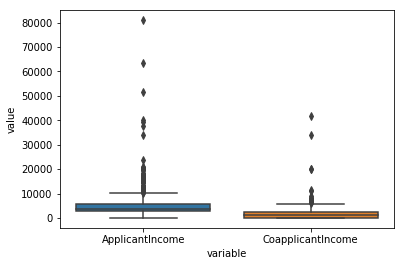

In [39]:
# Outliers in Train Data
df = pd.DataFrame(data = train_data, columns = ['ApplicantIncome','CoapplicantIncome'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))

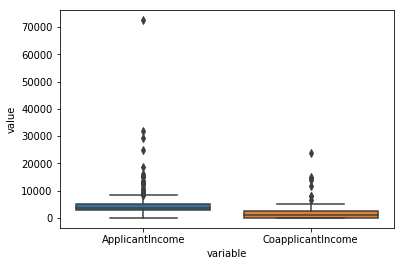

In [40]:
# Outliers in Test Data
dft = pd.DataFrame(data = test_data, columns = ['ApplicantIncome','CoapplicantIncome'])
sns.boxplot(x="variable", y="value", data=pd.melt(dft))

### OUTLIERS TREATMENT IN TRAIN AND TEST DATA

In [41]:
# Function for capping the outliers to thier 5% and 95% Quantile
def outliers(x):
    q1=x.quantile(0.05)
    q3=x.quantile(0.95)
    IQR=q3-q1
    low= q1-1.5*IQR
    high= q3+1.5*IQR
    #print(high)
    return high

In [42]:
# Capping outliers in train and test data for "ApplicationIncome"
tr_app_inc_high=outliers(train_data['ApplicantIncome'])
train_data.loc[train_data['ApplicantIncome']>int(tr_app_inc_high),'ApplicantIncome'] = int(tr_app_inc_high)

te_app_inc_high=outliers(test_data['ApplicantIncome'])
test_data.loc[test_data['ApplicantIncome']>int(te_app_inc_high),'ApplicantIncome'] = int(te_app_inc_high)

In [43]:
# Capping outliers in train and test data for "CoapplicantIncome"
tr_coapp_inc_high=outliers(train_data['CoapplicantIncome'])
train_data.loc[train_data['CoapplicantIncome']>int(tr_coapp_inc_high),'CoapplicantIncome'] = int(tr_coapp_inc_high)

te_coapp_inc_high=outliers(test_data['CoapplicantIncome'])
test_data.loc[test_data['CoapplicantIncome']>int(te_coapp_inc_high),'CoapplicantIncome'] = int(te_coapp_inc_high)

### DATA TREATMENT FOR "Dependents" COLUMN IN TRAIN AND TEST DATA

Since there are rows in the "Dependents" column where 3+ is mentioned for customers with 3 and above 3 dependents. So it is better to normalise the data before giving it to the model.

In [44]:
train_data['Dependents'].replace("3+","3", inplace=True)
test_data['Dependents'].replace("3+","3", inplace=True)

### CHANGING THE DATATYPES OF COLUMNS IN TRAIN AND TEST DATA

In [45]:
col_lis=['LoanAmount','Loan_Amount_Term','Credit_History','CoapplicantIncome']
for i in col_lis:
    train_data[i]=train_data[i].astype(int)
    test_data[i]=test_data[i].astype(int)

### LABEL ENCODING THE CATEGORICAL VARIABLES IN TRAIN AND TEST DATA

In [46]:
from sklearn.preprocessing import LabelEncoder
tr_lb_list=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
lb=LabelEncoder()

for i in tr_lb_list:
    train_data[i]=lb.fit_transform(train_data[i])
    
ts_lb_list=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in ts_lb_list:
    test_data[i]=lb.fit_transform(test_data[i])

### CORRELATION PLOT

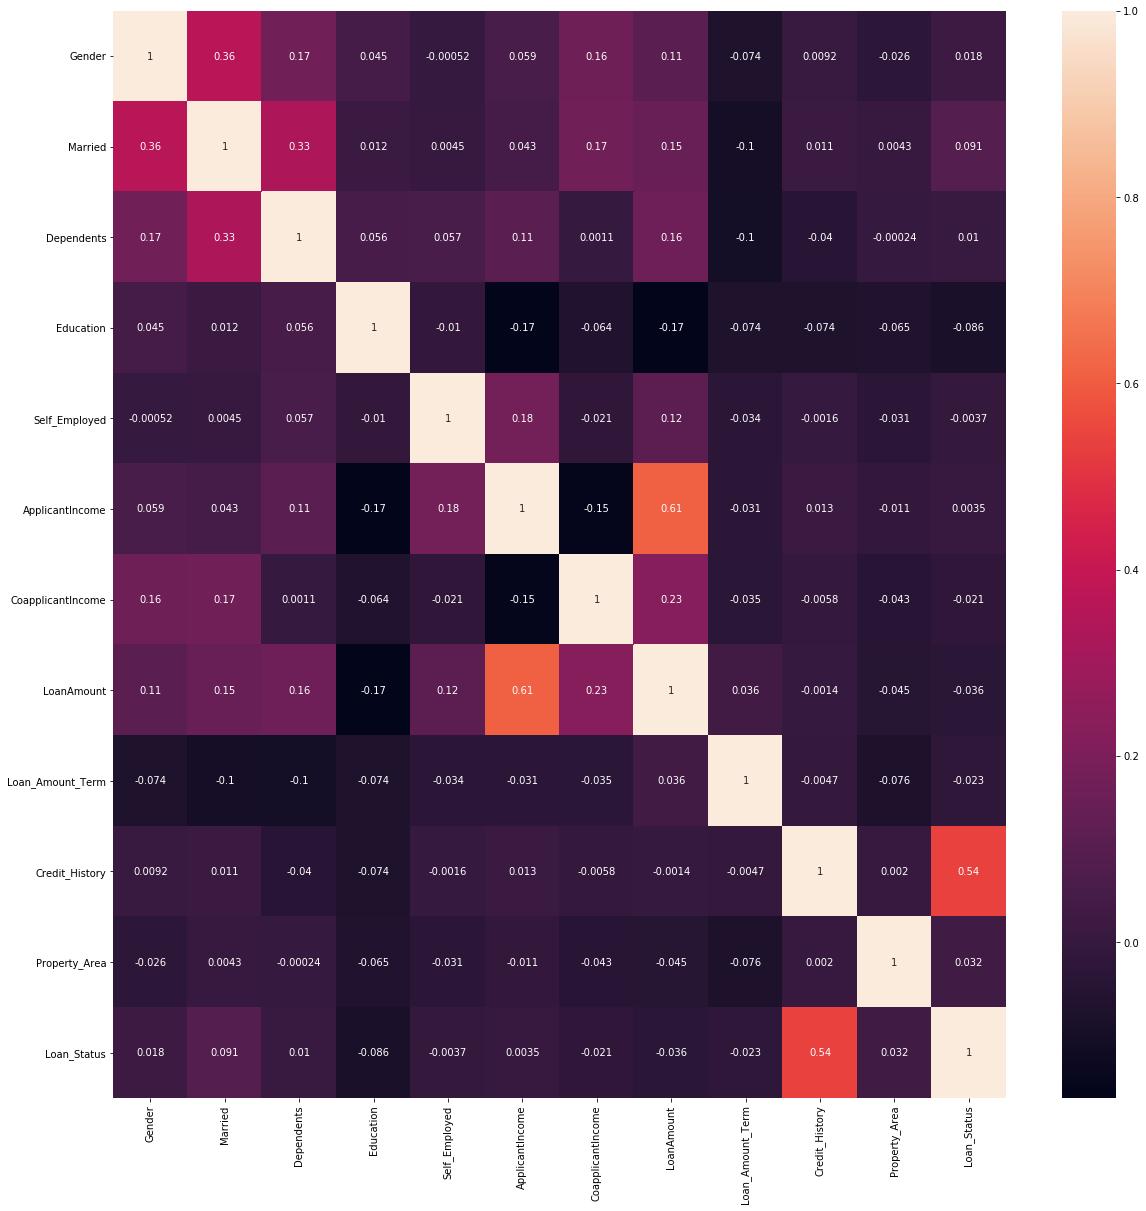

In [47]:
fig, ax= plt.subplots(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

### PREPARING TRAINING AND TESTING DATA FOR MODEL

In [48]:
X_train=train_data.drop(['Loan_Status','Loan_ID'], axis=1)

In [49]:
y_train=train_data['Loan_Status']

In [50]:
X_test=test_data.drop(['Loan_ID'], axis=1)

In [51]:
y_test=val_data['outcome']
y_test=y_test.replace("Y",1)
y_test=y_test.replace("N",0)
print(y_test.value_counts())

1    290
0     77
Name: outcome, dtype: int64


### LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

lr=LogisticRegression(random_state=1)
lr_model=lr.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)
y_train_pred = lr_model.predict(X_train)

print("Train classification_report: \n",classification_report(y_train, y_train_pred))
print("Test classification_report: \n",classification_report(y_test,lr_pred))
print("Train confusion_matrix: \n",confusion_matrix(y_train, y_train_pred))
print("Test confusion_matrix: \n",confusion_matrix(y_test,lr_pred))
print("Train Accuracy:",lr_model.score(X_train,y_train))
print("Test Accuracy:",lr_model.score(X_test,y_test))

scores = cross_val_score(lr, X_train,y_train, cv=10)
print("Cross validated scores:", scores)

Train classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.43      0.58       192
           1       0.79      0.98      0.88       422

   micro avg       0.81      0.81      0.81       614
   macro avg       0.85      0.70      0.73       614
weighted avg       0.83      0.81      0.78       614

Test classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85        77
           1       0.94      1.00      0.97       290

   micro avg       0.95      0.95      0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367

Train confusion_matrix: 
 [[ 82 110]
 [  8 414]]
Test confusion_matrix: 
 [[ 58  19]
 [  1 289]]
Train Accuracy: 0.8078175895765473
Test Accuracy: 0.9455040871934605
Cross validated scores: [0.79365079 0.82539683 0.7704918  0.75409836 0.78688525 0.78688525
 0.86885246 0.85245902 0.803

### RANDOM FOREST CLASSIFIER

Train classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.43      0.59       192
           1       0.79      0.98      0.88       422

   micro avg       0.81      0.81      0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.79       614

Test classification_report: 
               precision    recall  f1-score   support

           0       0.98      0.75      0.85        77
           1       0.94      1.00      0.97       290

   micro avg       0.95      0.95      0.95       367
   macro avg       0.96      0.87      0.91       367
weighted avg       0.95      0.95      0.94       367

Train confusion_matrix: 
 [[ 83 109]
 [  7 415]]
Test confusion_matrix: 
 [[ 58  19]
 [  1 289]]
Train Accuracy: 
 0.8110749185667753
Test Accuracy: 
 0.9455040871934605
Accuracy:
 0.9455040871934605
AUC:
 0.8748992386923422


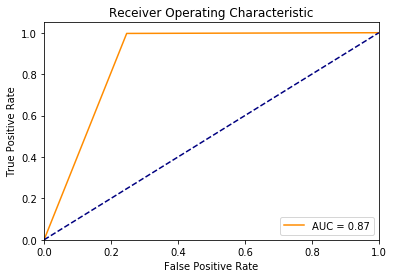

Cross validated scores: [0.79365079 0.82539683 0.75409836 0.75409836 0.78688525 0.78688525
 0.86885246 0.85245902 0.81967213 0.83606557]


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_curve, auc
rf=RandomForestClassifier(random_state=1,max_depth=3)
rf_model=rf.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
tr_rf_pred=rf_model.predict(X_train)



print("Train classification_report: \n",classification_report(y_train,tr_rf_pred))
print("Test classification_report: \n",classification_report(y_test,rf_pred))
print("Train confusion_matrix: \n",confusion_matrix(y_train,tr_rf_pred))
print("Test confusion_matrix: \n",confusion_matrix(y_test,rf_pred))
print("Train Accuracy: \n",rf_model.score(X_train,y_train))
print("Test Accuracy: \n",rf_model.score(X_test,y_test))
print("Accuracy:\n",accuracy_score(y_test, rf_pred))

false_positive_rate, true_positive_rate, _ = roc_curve(y_test,rf_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:\n",roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate,color='darkorange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],color='navy',linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

scores = cross_val_score(rf, X_train,y_train, cv=10)
print("Cross validated scores:", scores)

### RANDOM FOREST PARAMETER TUNNING

In [54]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':[100, 200, 400, 600], 'max_depth':[2, 4, 6], 'max_features': [2, 3, 4]}
# rf=RandomForestClassifier(random_state=1)
# clf = GridSearchCV(rf, parameters, cv=5)
# clf.fit(X_train,y_train)
# print("Best Estimators\n:",clf.best_estimator_)
# print("Best Parameters\n:",clf.best_params_)

### DECISION TREE CLASSIFIER

Train classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.45      0.60       192
           1       0.80      0.98      0.88       422

   micro avg       0.82      0.82      0.82       614
   macro avg       0.86      0.72      0.74       614
weighted avg       0.84      0.82      0.79       614

Test classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83        77
           1       0.94      0.98      0.96       290

   micro avg       0.93      0.93      0.93       367
   macro avg       0.93      0.87      0.89       367
weighted avg       0.93      0.93      0.93       367

Train confusion_matrix: 
 [[ 86 106]
 [  7 415]]
Test confusion_matrix: 
 [[ 58  19]
 [  5 285]]
Train Accuracy: 
 0.8110749185667753
Test Accuracy: 
 0.9455040871934605
Accuracy:
 0.9346049046321526
AUC:
 0.8680026869682043


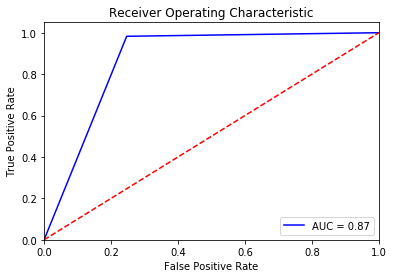

Cross validated scores: [0.80952381 0.82539683 0.7704918  0.75409836 0.78688525 0.78688525
 0.85245902 0.85245902 0.80327869 0.81967213]


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
dt=DecisionTreeClassifier(random_state=1,max_depth=3)
dt_model=dt.fit(X_train,y_train)
dt_pred=dt_model.predict(X_test)
tr_dt_pred=dt_model.predict(X_train)


print("Train classification_report: \n",classification_report(y_train,tr_dt_pred))
print("Test classification_report: \n",classification_report(y_test,dt_pred))
print("Train confusion_matrix: \n",confusion_matrix(y_train,tr_dt_pred))
print("Test confusion_matrix: \n",confusion_matrix(y_test,dt_pred))
print("Train Accuracy: \n",rf_model.score(X_train,y_train))
print("Test Accuracy: \n",rf_model.score(X_test,y_test))
print("Accuracy:\n",accuracy_score(y_test, dt_pred))

false_positive_rate, true_positive_rate, _ = roc_curve(y_test,dt_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:\n",roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

scores = cross_val_score(dt, X_train,y_train, cv=10)
print("Cross validated scores:", scores)

### DECESION TREE PARAMETER TUNNING

In [56]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'max_depth':[2, 4, 6], 'max_features': [2, 3, 4]}
# dt=DecisionTreeClassifier(random_state=1,max_depth=3)
# dt_clf = GridSearchCV(dt, parameters, cv=5)
# dt_clf.fit(X_train,y_train)
# print("Best Estimators\n:",dt_clf.best_estimator_)
# print("Best Parameters\n:",dt_clf.best_params_)

### XGBoost CLASSIFIER

Train Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.56      0.70       192
           1       0.83      0.99      0.90       422

   micro avg       0.85      0.85      0.85       614
   macro avg       0.89      0.77      0.80       614
weighted avg       0.87      0.85      0.84       614

Test Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88        77
           1       0.95      0.99      0.97       290

   micro avg       0.95      0.95      0.95       367
   macro avg       0.95      0.90      0.92       367
weighted avg       0.95      0.95      0.95       367

Train Confusion Matrix:
 [[107  85]
 [  6 416]]
Test Confusion Matrix:
 [[ 63  14]
 [  4 286]]
Train Accuracy:
 0.8517915309446255
Test Accuracy:
 0.9509536784741145
Accuracy:
 0.9509536784741145
AUC:
 0.902194357366771


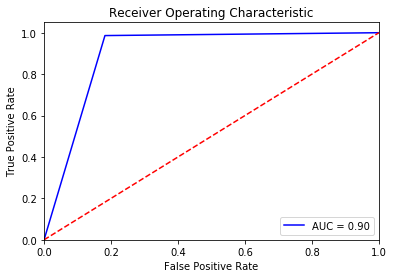

Cross validated scores: [0.74603175 0.80952381 0.75409836 0.72131148 0.78688525 0.78688525
 0.8852459  0.81967213 0.7704918  0.85245902]


In [57]:
# XGBoost 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
xgb = XGBClassifier(random_state=1)
# n_estimators = 100 (default)
# max_depth = 3 (default)
xgb_model=xgb.fit(X_train,y_train)
xgb_tr_pred=xgb_model.predict(X_train)
xgb_ts_pred=xgb_model.predict(X_test)

print("Train Classification Report:\n", classification_report(y_train,xgb_tr_pred))
print("Test Classification Report:\n", classification_report(y_test,xgb_ts_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train,xgb_tr_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test,xgb_ts_pred))
print("Train Accuracy:\n", xgb_model.score(X_train, y_train))
print("Test Accuracy:\n", xgb_model.score(X_test,y_test))
print("Accuracy:\n",accuracy_score(y_test, xgb_ts_pred))

false_positive_rate, true_positive_rate, _ = roc_curve(y_test,xgb_ts_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:\n",roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

scores = cross_val_score(xgb, X_train,y_train, cv=10)
print("Cross validated scores:", scores)